* As defined by Zillow, logerror=log(Zestimate)−log(SalePrice)
* so, exp(logerror) = Zestimate / SalePrice

In [1]:
train_full = pd.read_pickle('./train_full.pkl')

In [2]:
train_full.shape

(167888, 62)

#### Plotting Logerror

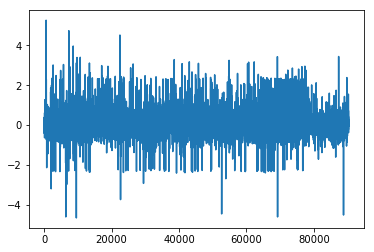

In [12]:
train_full.logerror.plot(kind='line')

In [4]:
import math

In [5]:
import numpy as np

#### Plotting the exp(logerror) values 

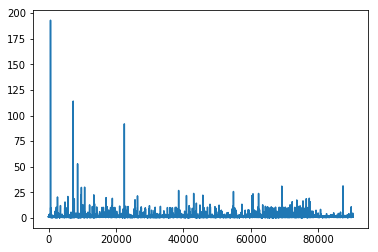

In [13]:
np.exp(train_full.logerror).plot(kind='line')

In [14]:
errors = np.exp(train_full.logerror)

In [15]:
errors.describe()

count    167888.000000
mean          1.036887
std           0.766753
min           0.009510
25%           0.975017
50%           1.006018
75%           1.039978
max         193.059542
Name: logerror, dtype: float64

In [16]:
train_full['errors'] = errors

* The value, `errors` is the ratio of Zestimate / SalePrice
* if `errors` < 1 , this means that Zestimate is lower than the Saleprice which means that Zillow has underestimated the price and overestimated the prices where `error` > 1

In [18]:
train_full_under = train_full[train_full.errors < 1]

In [19]:
train_full_over = train_full[train_full.errors >= 1]

In [20]:
train_full_under.shape

(73383, 63)

In [21]:
train_full_over.shape

(94505, 63)

In [22]:
94505/float(len(train_full))

0.5629050319260459

* We see Zillow tends to overestimate more than underestimate the prices ( around 56%)